In [520]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [521]:
df = pd.read_csv('The_Grades_Dataset.csv')
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [522]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [523]:
df.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

In [524]:
df.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


In [525]:
# print(f'General check for null values \n{df.isna().any()}\n')
print(f'Names of columns that contain null values: \n{df.columns[df.isna().any()].tolist()}\n')
print(f'Number of columns containing missing values: \n{len(df.columns[df.isna().any()].tolist())}\n')
print(f'Number of missing values in each column: \n{df.isna().sum()}')



# missingVal = df.columns[df.isna().any()]
# for i in missingVal:
#     print(f'{i}     {df[i].isna().sum()}')
    

Names of columns that contain null values: 
['CY-105', 'HS-105/12', 'MT-111', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']

Number of columns containing missing values: 
38

Number of missing values in each column: 
Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442      

In [526]:
df['CS-105'].value_counts()

A     151
A-    134
B+     60
B      51
A+     43
B-     38
C+     23
C      22
C-     22
D+     15
D      12
Name: CS-105, dtype: int64

In [527]:
# Manually getting the courses of 1st year
first_year_h = df.iloc[:,:-31] 

target_h = df.CGPA
# print(target_h)

# dropping seat number because it is not useful and doesn't have any affect on the grade
first_year_h.drop(['Seat No.'],axis=1,inplace=True)

first_year_h = pd.concat([first_year_h, df.CGPA], axis=1)


# dropping Rows having empty values 
first_year_h.dropna(inplace=True)

# Showing that there are no missing values in the dataset
first_year_h.isna().any(axis=0)


target_h = first_year_h.CGPA 



# AGAIN DROPPING CGPA BECAUSE IT WILL CAUSE ERROR INENCODING
first_year_h.drop(['CGPA'],axis=1,inplace=True)

# we will get integers as well as floats in our dataframe if there are any empty values in the dataset 
# reason is that we are using ordinal encoding to encode our categorical variables
# here we are checking that in which columns we have null values and we are dropping them from our dataframe




In [528]:
target_h

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
566    3.798
567    3.772
568    3.470
569    2.193
570    1.753
Name: CGPA, Length: 566, dtype: float64

In [529]:
first_year_h

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,C-
1,A,D,D+,D,B-,C,D,A,D+,D,B+
2,A,B,A,B-,B+,A,B-,B+,A-,A-,B-
3,D,C+,D+,D,D,A-,D+,C-,D,C+,D
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,C
...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,A+
567,A+,A,A,A,A,A,A,A-,A,A,A+
568,B,A,A-,B+,A,A,A,A,A,B,A+
569,A,B+,D,A,D,D+,B-,C-,B-,C-,A+


In [530]:
#establish the dictionary to use for ordinal encoding of categorical variables

# suppose 
# A + :  1 ,
# A   : 2 ,
# A-  : 3 ,
# B+  : 4 ,
# B   : 5 ,
# B-  : 6 ,
# C+  : 7 ,
# C   : 8 ,
# C-  : 9 ,
# D+  : 10 ,
# D   : 11 ,
# D-  : 12 ,
# F   : 13 ,
# P   : 14 ,
# W   : 15 ,
# WU  : 16 ,

#   , 2 ,  3 , 4  , 5 , 6  , 7  , 8 ,  9 , 10 , 11 , 12 , 13, 14 , 15 , 16 


dicitonary_h = [{'col': 'CS-105', 'mapping':{'A+': 1, 'A': 2, 'A-': 3, 'B+': 4, 'B': 5, 'B-': 6, 'C+': 7, 'C': 8, 'C-': 9, 'D+': 10, 'D': 11, 'D-': 12, 'F': 13, 'P': 14, 'W': 15, 'WU': 16}}]

In [531]:
from sklearn.model_selection import train_test_split

In [532]:
# use ordinal encoding to encode our column 

import category_encoders as ce


In [533]:
dicitonary_h = []

# dictionary within list
# we are mapping grades to numbers 

for i in first_year_h:    
    dicitonary_h.append({'col': str(i), 'mapping':{'A+': 1, 'A': 2, 'A-': 3, 'B+': 4, 'B': 5, 'B-': 6, 'C+': 7, 'C': 8, 'C-': 9, 'D+': 10, 'D': 11, 'D-': 12, 'F': 13, 'P': 14, 'W': 15, 'WU': 16}})

#instantiate the encoder
for i in first_year_h:    
    column_names_h = str(i)
    encoder = ce.OrdinalEncoder(cols=[column_names_h], mapping=dicitonary_h)
    # print("encoder: ",encoder)
    # print(first_year_h.dtypes)
    # X_train_h , X_test_h  = train_test_split(first_year_h , random_state=42)
    X_train_encoded_h = encoder.fit_transform(first_year_h)

    print(X_train_encoded_h)

     PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  \
0         6      10       9          8       9      10      11       9   
1         2      11      10         11       6       8      11       2   
2         2       5       2          6       4       2       6       4   
3        11       7      10         11      11       3      10       9   
4         3       3       3          4       2       2       3       4   
..      ...     ...     ...        ...     ...     ...     ...     ...   
566       5       2       2          3       1       2       3       3   
567       1       2       2          2       2       2       2       3   
568       5       2       3          4       2       2       2       2   
569       2       4      11          2      11      10       6       9   
570       8      11      11          8       8      10       5       7   

     EE-119  ME-107  CS-107  
0         6       9     9.0  
1        10      11     4.0  
2         3       3  

In [534]:
X_train_encoded_h

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107
0,6,10,9,8,9,10,11,9,6,9,9.0
1,2,11,10,11,6,8,11,2,10,11,4.0
2,2,5,2,6,4,2,6,4,3,3,6.0
3,11,7,10,11,11,3,10,9,11,7,11.0
4,3,3,3,4,2,2,3,4,2,3,8.0
...,...,...,...,...,...,...,...,...,...,...,...
566,5,2,2,3,1,2,3,3,1,4,1.0
567,1,2,2,2,2,2,2,3,2,2,1.0
568,5,2,3,4,2,2,2,2,2,5,1.0
569,2,4,11,2,11,10,6,9,6,9,1.0


In [535]:
X_train_encoded_h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566 entries, 0 to 570
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     566 non-null    int32  
 1   HS-101     566 non-null    int32  
 2   CY-105     566 non-null    int32  
 3   HS-105/12  566 non-null    int32  
 4   MT-111     566 non-null    int32  
 5   CS-105     566 non-null    int32  
 6   CS-106     566 non-null    int32  
 7   EL-102     566 non-null    int32  
 8   EE-119     566 non-null    int32  
 9   ME-107     566 non-null    int32  
 10  CS-107     566 non-null    float64
dtypes: float64(1), int32(10)
memory usage: 31.0 KB


In [536]:
X_train_encoded_h

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107
0,6,10,9,8,9,10,11,9,6,9,9.0
1,2,11,10,11,6,8,11,2,10,11,4.0
2,2,5,2,6,4,2,6,4,3,3,6.0
3,11,7,10,11,11,3,10,9,11,7,11.0
4,3,3,3,4,2,2,3,4,2,3,8.0
...,...,...,...,...,...,...,...,...,...,...,...
566,5,2,2,3,1,2,3,3,1,4,1.0
567,1,2,2,2,2,2,2,3,2,2,1.0
568,5,2,3,4,2,2,2,2,2,5,1.0
569,2,4,11,2,11,10,6,9,6,9,1.0


In [537]:
X_train_encoded_h['CS-107'] = X_train_encoded_h['CS-107'].fillna(10).astype(int)

In [538]:
# Applying LINEAR REGRESSION 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import mglearn


In [539]:
X_train_encoded_h.shape

(566, 11)

In [540]:
X_train_encoded_h = pd.concat([X_train_encoded_h, target_h], axis=1)


X_train_encoded_h['CGPA'] = X_train_encoded_h['CGPA'].fillna(11).astype(int)


In [541]:
X_train_encoded_h

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107,CGPA
0,6,10,9,8,9,10,11,9,6,9,9,2
1,2,11,10,11,6,8,11,2,10,11,4,2
2,2,5,2,6,4,2,6,4,3,3,6,3
3,11,7,10,11,11,3,10,9,11,7,11,1
4,3,3,3,4,2,2,3,4,2,3,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...
566,5,2,2,3,1,2,3,3,1,4,1,3
567,1,2,2,2,2,2,2,3,2,2,1,3
568,5,2,3,4,2,2,2,2,2,5,1,3
569,2,4,11,2,11,10,6,9,6,9,1,2


In [542]:
target_h = target_h.fillna(0).astype(int) 
target_h

0      2
1      2
2      3
3      1
4      3
      ..
566    3
567    3
568    3
569    2
570    1
Name: CGPA, Length: 566, dtype: int32

In [557]:
from sklearn.model_selection import train_test_split
# X_train_h, X_test_h, y_train_h , y_test_h = train_test_split(X_train_encoded_h, target_h, test_size=0.2, random_state=42)

In [558]:
from sklearn.linear_model import LogisticRegression

# kNN, SVM 

# lr_h = LogisticRegression()
# lr_h.fit(X_train_encoded_h, target_h)

In [559]:
# y_pred_h = lr_h.predict(X_train_h)


In [560]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [556]:
# print("Accuracy of Model is : ", (accuracy_score(y_train_h, y_pred_h)*100),"%")

Accuracy of Model is :  99.5575221238938 %


In [561]:
X_train_h , X_test_h , y_train_h , y_test_h = train_test_split(X_train_encoded_h, target_h, test_size=0.2, random_state=42) 

In [566]:
from sklearn.neighbors import KNeighborsClassifier

classifier_h = KNeighborsClassifier(n_neighbors=5)
classifier_h.fit(X_train_encoded_h, target_h)

KNeighborsClassifier()

In [569]:
y_pred_h = classifier_h.predict(X_test_h)

In [570]:

from sklearn.metrics import confusion_matrix, classification_report

In [571]:
print(confusion_matrix(y_test_h, y_pred))
print(classification_report(y_test_h, y_pred))

[[ 5  3  0]
 [ 2 31  8]
 [ 0  5 60]]
              precision    recall  f1-score   support

           1       0.71      0.62      0.67         8
           2       0.79      0.76      0.77        41
           3       0.88      0.92      0.90        65

    accuracy                           0.84       114
   macro avg       0.80      0.77      0.78       114
weighted avg       0.84      0.84      0.84       114



In [572]:
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_encoded_h, target_h)
    pred_i = knn.predict(X_test_h)
    error.append(np.mean(pred_i != y_test_h))

Text(0, 0.5, 'Mean Error')

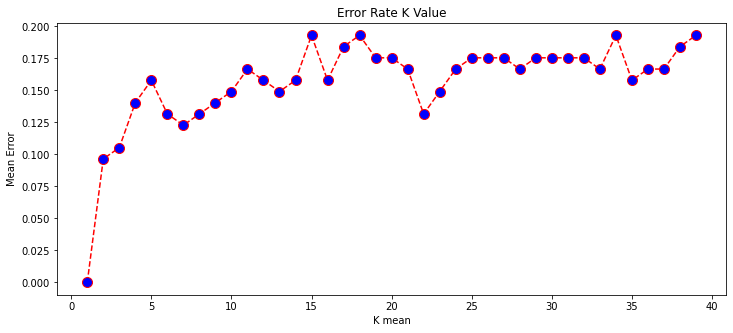

In [573]:
plt.figure(figsize=(12,5))
plt.plot(range(1,40),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K mean')
plt.ylabel('Mean Error')

In [574]:
print("Accuracy of Model is : ", (accuracy_score(y_test_h, y_pred_h)*100),"%")

Accuracy of Model is :  84.21052631578947 %
